In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno
import warnings
warnings.filterwarnings("ignore")
#%matplotlib inline
import ast
import math

In [2]:
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder

# EDA + Data Wrangling

In [111]:
df = pd.read_csv('1-50.csv')

In [112]:
df

,Unnamed: 0,CrunchBase Ranking,Profile Type,Organisation Name,Acquired by,About,Location,Number of Employees,Industry,IPO Status,...,Monthly Visits,Monthly Visits Growth,Number of Articles,Number of Events,Number of Funds,Number of Investments,Number of Diversity Investments,Number of Exits,Stock Symbol,Date Pulled
0,0,1,INVESTMENT FIRM,softbank,NaN,"['SoftBank provides fixed-line, mobile telepho...","Tokyo, Tokyo, Japan",10001+,"['Banking', 'Finance', 'Internet', 'Mobile', '...",NaN,...,"1,966",-73.81%,"['8,082']",['7'],3.0,251,24.0,54.0,['TYO:9984'],2021-03-14
1,1,2,ORGANIZATION,compassinc,NaN,['Compass is a real estate technology company ...,"New York, New York, United States",10001+,"['Property Management', 'Real Estate', 'Reside...",Private,...,"3,442,557",9.55%,['223'],['3'],NaN,NaN,NaN,NaN,NaN,2021-03-14
2,2,3,ORGANIZATION,zoom-video-communications,NaN,['Zoom is a software company that offers a com...,"San Jose, California, United States",1001-5000,"['Collaboration', 'Information Technology', 'M...",Public,...,"1,147,671,725",8.52%,"['2,917']",['42'],NaN,3,NaN,NaN,NaN,2021-03-14
3,3,4,INVESTMENT FIRM,crowdcube,NaN,['Crowdcube is an equity crowdfunding platform...,"Exeter, Devon, United Kingdom",51-100,"['Business Development', 'Finance', 'Financial...",NaN,...,"374,081",-9.12%,"['1,281']",['5'],1.0,"1,209",16.0,29.0,NaN,2021-03-14
4,4,5,ORGANIZATION,flutterwave,NaN,['Flutterwave is a fintech company that provid...,"San Francisco, California, United States",251-500,"['Financial Services', 'FinTech', 'Payments']",Private,...,"503,602",7.77%,['47'],['1'],NaN,NaN,NaN,NaN,NaN,2021-03-14
5,5,6,ORGANIZATION,klarna,NaN,['Klarna is an eCommerce payment solutions pla...,"Stockholm, Stockholms Lan, Sweden",1001-5000,"['E-Commerce', 'Finance', 'Financial Services'...",Private,...,"18,798,543",-1.76%,"['1,003']",['17'],NaN,3,NaN,1.0,NaN,2021-03-14
6,6,7,ORGANIZATION,ant-group,NaN,['Ant Group strives to enable all consumers an...,"Hangzhou, Zhejiang, China",5001-10000,"['Banking', 'E-Commerce', 'Financial Services'...",Private,...,"28,691",-12.04%,"['2,369']",['8'],NaN,97,NaN,12.0,NaN,2021-03-14
7,7,8,ORGANIZATION,intel,NaN,"['Intel designs, manufactures, and sells integ...","Santa Clara, California, United States",10001+,"['Artificial Intelligence', 'Information Techn...",Public,...,"36,895,672",-2.5%,"['30,754']",['492'],NaN,67,NaN,31.0,NaN,2021-03-14
8,8,9,ORGANIZATION,calendly,NaN,['Calendly is an automated scheduling tool tha...,"Atlanta, Georgia, United States",101-250,"['Productivity Tools', 'Recruiting', 'Scheduli...",Private,...,"15,838,478",8.21%,['37'],['1'],NaN,NaN,NaN,NaN,NaN,2021-03-14
9,9,10,INVESTMENT FIRM,apollo-global-management-llc,NaN,['Apollo Global Management is a global asset m...,"New York, New York, United States",1001-5000,"['Asset Management', 'Credit', 'Finance', 'Fin...",NaN,...,NaN,NaN,['807'],['2'],9.0,36,1.0,20.0,['NYSE:APO'],2021-03-14


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 43 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  50 non-null     int64  
 1   CrunchBase Ranking                          50 non-null     int64  
 2   Profile Type                                50 non-null     object 
 3   Organisation Name                           50 non-null     object 
 4   Acquired by                                 0 non-null      float64
 5   About                                       50 non-null     object 
 6   Location                                    50 non-null     object 
 7   Number of Employees                         50 non-null     object 
 8   Industry                                    50 non-null     object 
 9   IPO Status                                  44 non-null     object 
 10  IPO Date        

In [32]:
df.describe()

,Unnamed: 0,CrunchBase Ranking,Acquired by,Number of Investors,Number Funding Rounds,Number of Lead Investors,Number of Lead Investments,Number of Acquisitions,Number of Current Team Members (core team),Number of Board Members/Advisors,Total Products Active,Active Tech Count,Number of Funds,Number of Diversity Investments,Number of Exits
count,50.00000,50.00000,0.0,41.000000,49.000000,42.000000,23.000000,37.000000,44.000000,6.000000,49.000000,49.000000,5.000000,5.000000,19.000000
mean,24.50000,25.50000,NaN,18.268293,7.795918,5.357143,29.869565,17.027027,92.818182,15.000000,54.020408,65.204082,4.400000,17.000000,26.684211
std,14.57738,14.57738,NaN,10.168639,4.795743,3.434555,69.627779,25.227285,175.340104,15.824032,32.770343,39.253970,3.435113,15.280707,58.912414
min,0.00000,1.00000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,1.000000,1.000000,1.000000
25%,12.25000,13.25000,NaN,12.000000,4.000000,3.000000,1.000000,3.000000,15.750000,2.500000,28.000000,36.000000,2.000000,5.000000,1.000000
50%,24.50000,25.50000,NaN,18.000000,8.000000,4.500000,6.000000,6.000000,30.500000,11.000000,49.000000,65.000000,3.000000,16.000000,12.000000
75%,36.75000,37.75000,NaN,22.000000,10.000000,7.000000,22.500000,14.000000,65.250000,22.500000,75.000000,87.000000,7.000000,24.000000,25.000000
max,49.00000,50.00000,NaN,44.000000,24.000000,15.000000,325.000000,101.000000,902.000000,41.000000,165.000000,160.000000,9.000000,39.000000,262.000000


In [33]:
df.corr()

,Unnamed: 0,CrunchBase Ranking,Acquired by,Number of Investors,Number Funding Rounds,Number of Lead Investors,Number of Lead Investments,Number of Acquisitions,Number of Current Team Members (core team),Number of Board Members/Advisors,Total Products Active,Active Tech Count,Number of Funds,Number of Diversity Investments,Number of Exits
Unnamed: 0,1.000000,1.000000,NaN,0.010017,-0.019614,0.057866,-0.183560,-0.049538,-0.010447,0.299119,-0.003050,-0.197915,0.020096,-0.201881,-0.173492
CrunchBase Ranking,1.000000,1.000000,NaN,0.010017,-0.019614,0.057866,-0.183560,-0.049538,-0.010447,0.299119,-0.003050,-0.197915,0.020096,-0.201881,-0.173492
Acquired by,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Investors,0.010017,0.010017,NaN,1.000000,0.667010,0.669962,-0.506967,-0.007591,0.005617,-0.953458,-0.170047,0.139847,-0.917663,-0.024049,-0.681389
Number Funding Rounds,-0.019614,-0.019614,NaN,0.667010,1.000000,0.800010,-0.409368,-0.114903,0.001876,-0.665626,-0.076664,-0.050202,-0.478208,0.199395,-0.594179
Number of Lead Investors,0.057866,0.057866,NaN,0.669962,0.800010,1.000000,-0.438679,0.161217,0.171294,-0.306666,-0.053162,0.128470,-0.981981,-0.240192,-0.637183
Number of Lead Investments,-0.183560,-0.183560,NaN,-0.506967,-0.409368,-0.438679,1.000000,-0.049979,0.081077,0.871517,-0.333748,-0.213152,0.349943,0.910785,0.973644
Number of Acquisitions,-0.049538,-0.049538,NaN,-0.007591,-0.114903,0.161217,-0.049979,1.000000,0.877785,-0.082825,0.418106,-0.047723,0.924174,-0.318498,0.050955
Number of Current Team Members (core team),-0.010447,-0.010447,NaN,0.005617,0.001876,0.171294,0.081077,0.877785,1.000000,NaN,0.569542,0.183385,NaN,NaN,0.512824
Number of Board Members/Advisors,0.299119,0.299119,NaN,-0.953458,-0.665626,-0.306666,0.871517,-0.082825,NaN,1.000000,-0.224382,0.220372,0.161590,0.691622,0.825308


In [15]:
#dropping not useful cols using contextual info
df.drop(['Unnamed: 0', 'CrunchBase Ranking', 'Acquired by', 'Organisation Name', 'About', 'Website', 'Headquarters', 'Stock Symbol', 'Date Pulled'], axis=1, inplace=True)

In [38]:
def nan_eda(df):
    total_null = df.isna().sum().sort_values(ascending=False)
    percent = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
    missing_data = pd.concat([total_null, percent], axis=1, keys=['Total NaNs', 'Percent of NaNs'])
    return missing_data

In [39]:
#drop those with high percentage of NaNs
nan_eda(df)

,Total NaNs,Percent of NaNs
Acquired by,50,1.00
Investment Stage,46,0.92
Stock Symbol,46,0.92
Number of Funds,45,0.90
Number of Diversity Investments,45,0.90
Investor Type,44,0.88
Number of Board Members/Advisors,44,0.88
Related Hubs,33,0.66
Product Downloads in the Last 30 Days,33,0.66
Number of Exits,31,0.62


In [131]:
# #replot corr matrix
# features = [] 
# plt.figure(figsize = (10,10))
# sns.heatmap(df[features].corr(), annot = True, cmap = plt.cm.RdBu)
# plt.show()

In [94]:
df['Number of Articles'] = df['Number of Articles'].apply(lambda x: float(ast.literal_eval(x)[0].replace(',', '')) if x is not np.nan else np.nan)

In [96]:
df['Number of Events'] = df['Number of Events'].apply(lambda x: float(ast.literal_eval(x)[0].replace(',', '')) if x is not np.nan else np.nan)

In [119]:
df['Number of Investments'] = df['Number of Investments'].apply(lambda x: float(x.replace(',', '')) if x is not np.nan else np.nan)

In [46]:
def handle_numeric_nan(df):
    numeric_cols = df.select_dtypes(include='float').columns  
    #replacing nan with median
    for i in numeric_cols:
        df[i].replace('nan', np.nan)
        df[i].replace(np.nan, df[i].median(), inplace=True)

In [ ]:
def handle_cat_nan(df):
    cat_cols = df.select_dtypes(include='object').columns  
    #replacing nan with median
    for i in cat_cols:
        df[i].replace('nan', np.nan)
        df[i].replace(np.nan, df[i].mode(), inplace=True)

In [60]:
def handle_numeric_outliers(df):
    numeric_cols = df.select_dtypes(include='float').columns
    #log transforming values instead of dropping or replacing outliers to preserve original dataset and not drop rows
    for i in numeric_cols:
        df[i] = df[i].map(lambda i: np.log(i) if i > 0 else 0)

In [34]:
cat_cols = df.select_dtypes(include='object')
cat_cols.drop(['Founded Date'], axis=1, inplace=True)
for i in cat_cols:
    print(df[i].value_counts(), '\n')

USA    37632
nan     6937
GBR     3686
CAN     1924
IND     1593
       ...  
QAT        1
UZB        1
KNA        1
BLM        1
GRD        1
Name: Location, Length: 138, dtype: int64 

Software                                                            4006
Biotechnology                                                       3616
nan                                                                 3116
E-Commerce                                                          1335
Mobile                                                              1184
                                                                    ... 
E-Commerce|Open Source|Web Development                                 1
Big Data|Big Data Analytics|Digital Media|EBooks|Publishing|SaaS       1
Cloud Computing|Construction|Engineering Firms|Software                1
Internet|Marketplaces|Real Estate|Startups                             1
Cloud Computing|Enterprise Software|RIM|SaaS|Software                  1
Name: Indu

In [13]:
def categorical_var_to_str(df):
    cat_cols = df.select_dtypes(include='object').columns
    for i in cat_cols:
        df[i] = df[i].astype(str)

In [14]:
categorical_var_to_str(df)

In [52]:
df['Location Country'] = df['Location'].apply(lambda x: x.split(",")[-1].lstrip())

In [10]:
# TBC
def location_to_gdp(df):
    country_code = {'USA':21427700, 'IND':2875142, 'CHN':14342903, 'HKG':366030, 'CAN':1736426, 'CHL':282318, 'GBR':2827113, 'FRA':2715518, 'AUS':1392681, 'DNK':348078, 'ROM': 250077, 'AUT':446315, 'KOR':1642383, 'NLD':909070, 'SWE':530833, 'JPN':5081770, 'RUS':1699877, 'SGP':372063, 'NOR':403336, 'COL':323803, 'ESP':1394116, 'BEL':529607, 'IRL':388699, 'ITA':2001244, 'ISR':395099, 'NZL':206929, 'CZE':246489, 'DEU':3845630, 'CHE':703082, 'BRA':1839758, 'BGR':67927, 'SVN':54170, 'JOR':43744, 'HUN':160967, 'BWA':18341, 'NGA':448120, 'FIN':268761, 'TUR':754412, 'IDN':1119191, 'ARE':421142, 'CYP':24565, 'POL':592164, 'CRI':61774, 'PRT':237686, 'ARG':449663, 'TWN':574905, 'KHM':27089, 'THA':543650, 'SVK':105422, 'UKR':153781, 'LTU':54219, 'ISL':24188, 'ZAF':351432, 'MEX':1258287, 'VEN':6396, 'URY':56046, 'MUS':14180, 'KEN':95503, 'PHL':376796, 'MNE':5495, 'VNM':261921, 'GHA':66984, 'PSE':14616, 'MYS':364702, 'PER':226848, 'EGY':303175, 'PAN':66801, 'LVA':34117, 'GGY':4549.30, 'ALB':15278, 'UGA':34387, 'HRV':60416, 'EST':31387, 'LBN':5199, 'GRC':209853, 'PAK':287200, 'NPL':30641, 'LUX':71105, 'SAU':792967, 
                    'IRN': 458500, 'GTM':76710, 'BAH':38574, 'ARM':13673, 'BGD':302571, 'MDA':11969, 'SRB':51475, 'TUN':38800, 'ZWE':21440, 'BRB':5209, 'NIC':12521, 'TAN':63177, 'PRI':104989, 'TTO':24270, 'BHR':38574, 'CMR':39007, 'BLR':63080, 'CYM':6020, 'BRN':13469, 'ECU':107436, 'SLV':27023, 'MLT':14989, 'ZMB':23310, 'MKD':12547, 'GIB':2344, 'TGO':5490, 'LAO':18174, 'BMU':7361, 'HND':25095, 'MCO':7423, 'MMR':76086, 'KAZ':181666, 'QAT':175838, 'DOM':88940, 'MAR':119700, 'LIE':6797, 'GEO':17477, 'MOZ':15291, 'DZA':171091, 'JAM':16458, 'KNA':1053, 'AZE':48048, 'SEN':23578, 'RWA':10354, 'DMA':582.4, 'UZB':57921, 'BLZ':1880, 'OMN':76332, 'JEY':6630, 'KWT':134629, 'CIV':58539, 'BLM':0, 'GRD':1211, 'LKA':84009, 'SOM':1626, 'SYC':1703, 'PRY':38145, 'MAF':561.50}
    df.replace({"Location": country_code}, inplace=True) 

In [11]:
location_to_gdp(df)

In [12]:
df

,CrunchBase Ranking,Location,Number of Employees,Industry,IPO Status,Founded Date,Founders,Operating Status,Hub Tags,Last Funding Type,...,Number of Diversity Investments,Number of Exits,Related Hubs,Investor Type,Stock Symbol,IPO Date,Number of Sub Organisations,Funding Rounds,Funds Raised (for VC),Number of Lead Investments
0,NaN,2875142.0,NaN,Media,NaN,NaN,NaN,operating,NaN,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,NaN,21427700.0,NaN,Application Platforms|Real Time|Social Network...,NaN,4/9/2014,NaN,operating,NaN,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,NaN,NaN,NaN,Apps|Games|Mobile,NaN,NaN,NaN,operating,NaN,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,NaN,14342903.0,NaN,Curated Web,NaN,1/1/2007,NaN,operating,NaN,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,NaN,21427700.0,NaN,Software,NaN,1/1/2010,NaN,operating,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,NaN,14342903.0,NaN,Enterprise Software,NaN,NaN,NaN,operating,NaN,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
66364,NaN,60416.0,NaN,Advertising|Mobile|Web Development|Wireless,NaN,13/5/2012,NaN,operating,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
66365,NaN,NaN,NaN,NaN,NaN,1/1/2011,NaN,operating,NaN,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
66366,NaN,21427700.0,NaN,Consumer Electronics|Internet of Things|Teleco...,NaN,1/1/2014,NaN,operating,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [ ]:
df['Industry'] = df['Industry'].apply(lambda x: ast.literal_eval(x))
df['Industry'] = df['Industry'].apply(lambda x:" ".join(a for a in x))

In [20]:
ind_counts = df['Industry'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [132]:
class Kmeans:
    """ 
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        Returns
        -------
        instance of kmeans class
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = ind_counts['unique_values']


tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

#create tfidf array based on unique industries

In [134]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=4, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

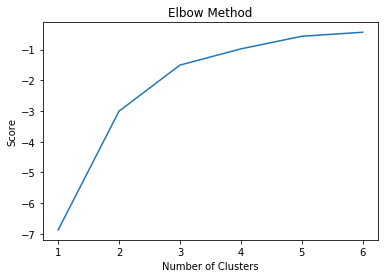

In [135]:
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

#from plot ideal number of clusters appears to be 4

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


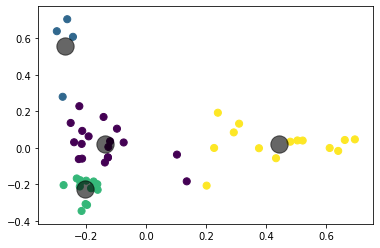

In [142]:
from sklearn.metrics import pairwise_distances
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(4, 1, 600)
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [143]:
prediction

array([0, 0, 0, 2, 3, 1, 0, 0, 1, 3, 1, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 3, 2, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0,
       2, 2, 2, 0, 0], dtype=int32)

In [144]:
len(prediction)

49

In [145]:
len(df['Industry'].unique())

49

In [146]:
ind_counts['cluster'] = prediction

In [147]:
#one hot encode with 4 categorical variables: 0, 1, 2, 3
ind_counts

,unique_values,counts,cluster
0,Cycling Fitness Wellness,2,0
1,Artificial Intelligence Gaming GPU Hardware Ro...,1,0
2,Clean Energy CleanTech Energy Efficiency Energ...,1,0
3,Delivery Food and Beverage Food Delivery Resta...,1,2
4,Crowdsourcing Cyber Security Network Security ...,1,3
5,Banking Finance Financial Services Venture Cap...,1,1
6,Analytics Cloud Data Services Enterprise Softw...,1,0
7,Productivity Tools Recruiting Scheduling Software,1,0
8,Finance Financial Services FinTech Trading Pla...,1,1
9,Asset Management Cloud Security Cyber Security...,1,3


In [ ]:
def fundtype_to_ohe(df):
    ohe_types = pd.get_dummies(df['Last Funding Type'], prefix='type')
    df = pd.concat([df.drop('Last Funding Type', axis=1), ohe_types], axis=1)

In [38]:
def ind_to_ohe(df):
    industries = {k:v for k, v in zip(ind_counts['unique_values'], ind_counts['cluster'])}
    df.replace({"Industry": industries}, inplace=True)

In [ ]:
def opstatus_to_le(df):
    df["Operating Status"] = df["Operating Status"].astype('category').cat.codes

In [128]:
def employees_to_ohe(df):
    ohe_types = pd.get_dummies(df['Number of Employees'], prefix='type')
    df = pd.concat([df.drop('Number of Employees', axis=1), ohe_types], axis=1)

# Model

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# model imports
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Scaling data

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Fitting models

## Random forest

In [ ]:
rf = RandomForestClassifier(n_estimators=50) 
rf.fit(X_train, y_train)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
rf_acc = accuracy_score(y_test, y_pred_rf)

## Naive bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
nb_acc = accuracy_score(y_test, y_pred_nb)

## SVM

In [ ]:
svm = LinearSVC()
svm.fit(X_train, y_train)

In [ ]:
y_pred_svm = svm.predict(X_test)

In [ ]:
svm_acc = accuracy_score(y_test, y_pred_svm)